# Quick start
```{warning}
It is currently under devellopement. Please contact me before using it.
```

## Load CraFT output

In [1]:
import xarray_craft.loadData_craft as ldc
import xarray_symTensor2d.xarray_symTensor2d as xsT
import xarray_craft.gamma as xg
import xarray_craft.craft as xc

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
adr='/home/chauvet/Documents/GitToolboxs/pyCraFT/Exemple/data/'
time='09.20000000e+04'

In [3]:
ds=ldc.craft1time_2d(adr,time)

craft_output_2020_12_23_13:05.12_t=09.20000000e+04_strain11.vtk
craft_output_2020_12_23_13:05.12_t=09.20000000e+04_strain22.vtk
craft_output_2020_12_23_13:05.12_t=09.20000000e+04_strain33.vtk
craft_output_2020_12_23_13:05.12_t=09.20000000e+04_strain12.vtk
craft_output_2020_12_23_13:05.12_t=09.20000000e+04_strain13.vtk
craft_output_2020_12_23_13:05.12_t=09.20000000e+04_strain23.vtk
craft_output_2020_12_23_13:05.12_t=09.20000000e+04_stress11.vtk
craft_output_2020_12_23_13:05.12_t=09.20000000e+04_stress22.vtk
craft_output_2020_12_23_13:05.12_t=09.20000000e+04_stress33.vtk
craft_output_2020_12_23_13:05.12_t=09.20000000e+04_stress12.vtk
craft_output_2020_12_23_13:05.12_t=09.20000000e+04_stress13.vtk
craft_output_2020_12_23_13:05.12_t=09.20000000e+04_stress23.vtk
craft_output_2020_12_23_13:05.12_t=09.20000000e+04_gamma01.vtk
craft_output_2020_12_23_13:05.12_t=09.20000000e+04_gamma02.vtk
craft_output_2020_12_23_13:05.12_t=09.20000000e+04_gamma03.vtk
craft_output_2020_12_23_13:05.12_t=09.20000

In [4]:
ds

<xarray.Dataset>
Dimensions:      (g: 12, sT: 6, time: 1, uvecs: 2, x: 495, y: 539)
Coordinates:
  * x            (x) float64 0.0 0.15 0.3 0.45 0.6 ... 73.65 73.8 73.95 74.1
  * y            (y) float64 0.0 0.15 0.3 0.45 0.6 ... 80.25 80.4 80.55 80.7
Dimensions without coordinates: g, sT, time, uvecs
Data variables:
    orientation  (y, x, uvecs) float64 5.112 1.017 5.112 ... 1.14 3.454 1.14
    quality      (y, x) float64 100.0 100.0 100.0 100.0 ... 100.0 100.0 100.0
    micro        (y, x) bool True True True True True ... True True True True
    grainId      (y, x) float32 74.0 74.0 74.0 74.0 74.0 ... 11.0 11.0 11.0 11.0
    strain       (time, y, x, sT) float64 0.003301 -0.005215 ... 0.0006602
    stress       (time, y, x, sT) float64 1.274 0.5916 0.6825 ... -0.1443 0.2065
    gamma        (time, y, x, g) float64 0.004711 -0.007798 ... -5.391e-08
Attributes:
    unit:       millimeters
    step_size:  0.15
    path_dat:   /home/chauvet/Documents/GitToolboxs/pyCraFT/Exemple/data/CI02...
    simu_time:  09.20000000e+04

In [5]:
ds['eqStrain']=ds.strain.sT.eqVonMises()
ds['eqStress']=ds.stress.sT.eqVonMises()

Text(0.5, 1.0, 'equivalent stress')

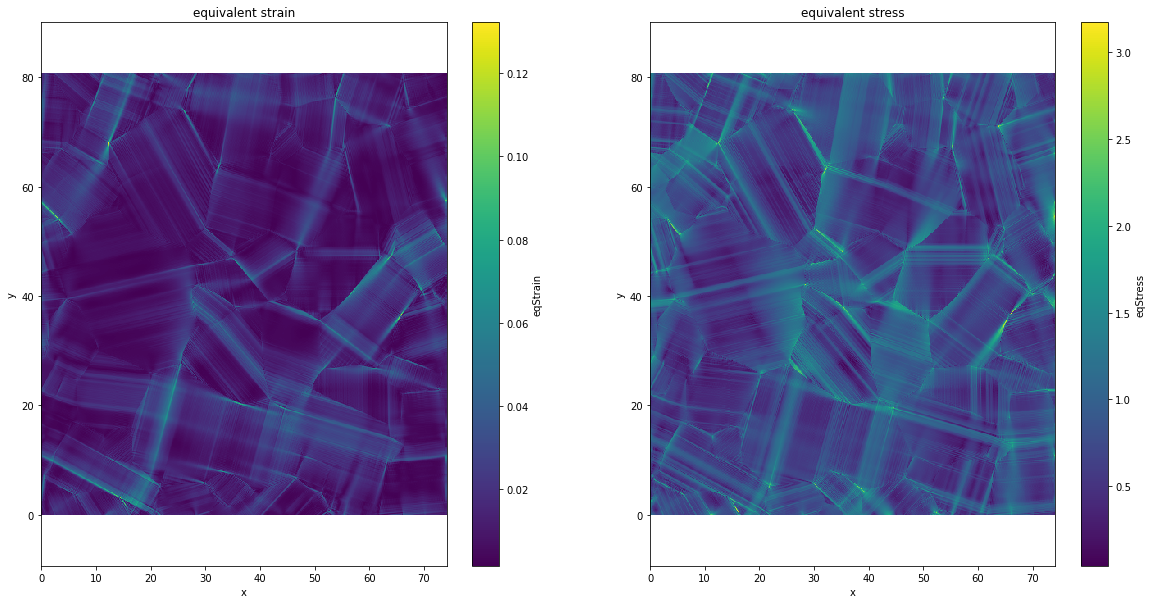

In [6]:
plt.figure(figsize=(20,10))
plt.subplot(121)
ds.eqStrain.plot()
plt.axis('equal')
plt.title('equivalent strain')
plt.subplot(122)
ds.eqStress.plot()
plt.axis('equal')
plt.title('equivalent stress')

In [7]:
ds

<xarray.Dataset>
Dimensions:      (g: 12, sT: 6, time: 1, uvecs: 2, x: 495, y: 539)
Coordinates:
  * x            (x) float64 0.0 0.15 0.3 0.45 0.6 ... 73.65 73.8 73.95 74.1
  * y            (y) float64 0.0 0.15 0.3 0.45 0.6 ... 80.25 80.4 80.55 80.7
Dimensions without coordinates: g, sT, time, uvecs
Data variables:
    orientation  (y, x, uvecs) float64 5.112 1.017 5.112 ... 1.14 3.454 1.14
    quality      (y, x) float64 100.0 100.0 100.0 100.0 ... 100.0 100.0 100.0
    micro        (y, x) bool True True True True True ... True True True True
    grainId      (y, x) float32 74.0 74.0 74.0 74.0 74.0 ... 11.0 11.0 11.0 11.0
    strain       (time, y, x, sT) float64 0.003301 -0.005215 ... 0.0006602
    stress       (time, y, x, sT) float64 1.274 0.5916 0.6825 ... -0.1443 0.2065
    gamma        (time, y, x, g) float64 0.004711 -0.007798 ... -5.391e-08
    eqStrain     (time, y, x) float64 0.005463 0.007155 ... 0.00312 0.002566
    eqStress     (time, y, x) float64 1.121 1.095 1.153 ... 0.4573 0.3392 0.3612
Attributes:
    unit:       millimeters
    step_size:  0.15
    path_dat:   /home/chauvet/Documents/GitToolboxs/pyCraFT/Exemple/data/CI02...
    simu_time:  09.20000000e+04

In [8]:
ds['strain_energy']=ds.craft.strain_energy()

(-0.075, 74.17499999999998, -0.075, 80.775)

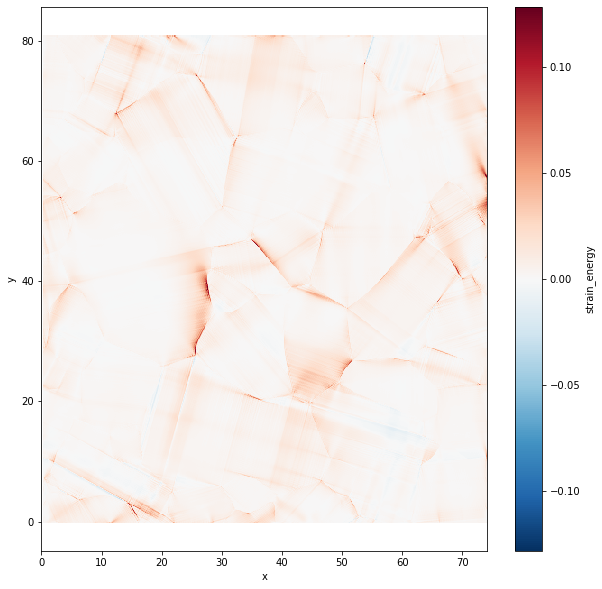

In [9]:
plt.figure(figsize=(10,10))
ds.strain_energy.plot()
plt.axis('equal')

In [10]:
ds['ba_ac']=ds.gamma.gamma.gamma_activity(plane='ba')
ds['pr_ac']=ds.gamma.gamma.gamma_activity(plane='pr')
ds['py_ac']=ds.gamma.gamma.gamma_activity(plane='py')

Text(0.5, 1.0, 'pyramidal activity')

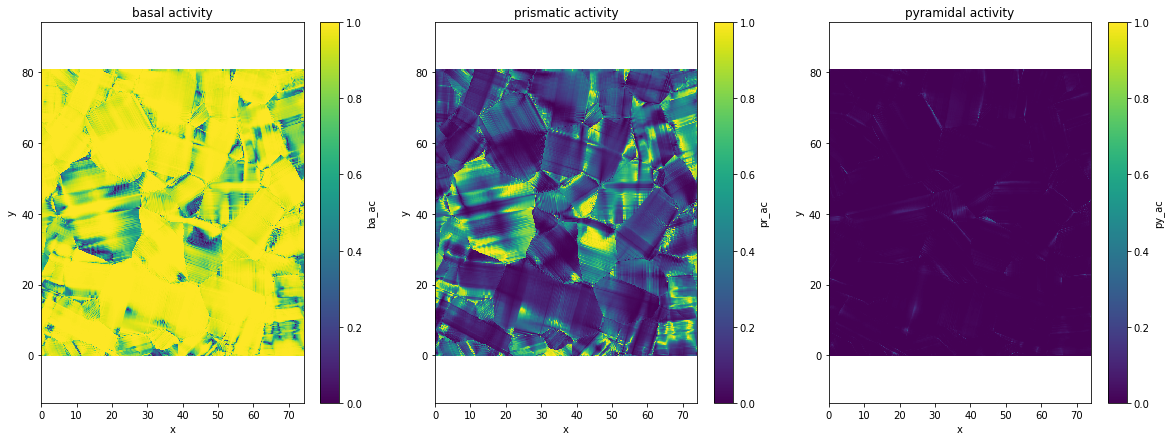

In [11]:
plt.figure(figsize=(20,7))
plt.subplot(131)
ds.ba_ac.plot(vmin=0,vmax=1)
plt.axis('equal')
plt.title('basal activity')
plt.subplot(132)
ds.pr_ac.plot(vmin=0,vmax=1)
plt.axis('equal')
plt.title('prismatic activity')
plt.subplot(133)
ds.py_ac.plot(vmin=0,vmax=1)
plt.axis('equal')
plt.title('pyramidal activity')

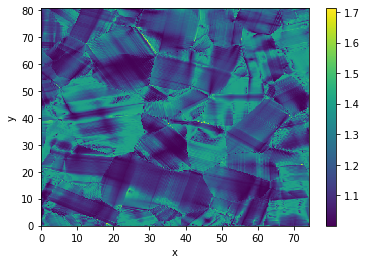

In [12]:
plt.figure()
(ds.ba_ac+ds.py_ac+ds.pr_ac).plot()
plt.axis('equal')